In [1]:
!pip install transformers -q
!pip install sentencepiece -q

     |████████████████████████████████| 2.9 MB 13.0 MB/s 
     |████████████████████████████████| 56 kB 4.6 MB/s 
     |████████████████████████████████| 895 kB 46.6 MB/s 
     |████████████████████████████████| 636 kB 42.3 MB/s 
     |████████████████████████████████| 3.3 MB 30.8 MB/s 
     |████████████████████████████████| 1.2 MB 11.4 MB/s 


In [2]:
import pandas as pd

import sys
# For running via Colab
sys.path.append('/content/drive/MyDrive/Colab Notebooks')
from bert_finetuner import *
from plotting_helper import *
from common_helpers import *

In [3]:
data = pd.read_json('/content/drive/MyDrive/song_lyric_map.json')
#data = pd.read_json('https://raw.githubusercontent.com/pradeep-miriyala/multi-modal-bert-models/main/data/song_lyric_map.json?token=ADXRNFRS46PTRG46WUZLXHDBKH7HY')
IMG_PATH = '/content/drive/MyDrive/melSpectrogram'

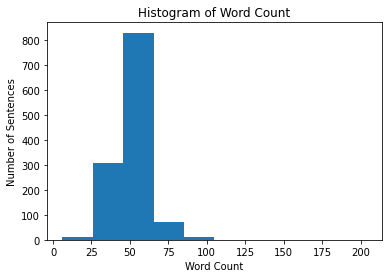

In [4]:
plot_histogram(data['Lyric'])

##### From the histogram, it is evident that most of the sentences have 50 words and some have 75. Although there are sentences with 100 words, the perecentage is very minimal. Hence maximum sequence length is considered as 75.

In [5]:
MAX_SEQ_LEN = 75
gpu, cpu = get_devices()

In [6]:
chk_point = 'xlm-roberta-base'
base_model, tokenizer = load_bert_model(chk_point)

Downloading:   0%|          | 0.00/512 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.04G [00:00<?, ?B/s]

Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaModel: ['lm_head.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.decoder.weight']
- This IS expected if you are initializing XLMRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/4.83M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/8.68M [00:00<?, ?B/s]

In [7]:
sequences, attention_masks, targets = process_data_w_base_model(data, tokenizer, max_seq_len=MAX_SEQ_LEN)

In [8]:
txt_only_results = run_k_fold(base_model, gpu, data, sequences, attention_masks, targets, fusion=FusionTypes.TXT,
                                       k_folds=5, epochs=10, balance_classes=True, dropout_level=0.1, lr=2e-4,
                                       max_seq_len=MAX_SEQ_LEN, n_layers=1, clip_at=1.0, img_path=IMG_PATH, hidden_dim=256)

Running Text Only Classification
FOLD 0


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


Class Weights : [1.55520505 0.73692078]
Epoch 1 / 10
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.704 / Validation : 0.690


/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:154: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Time for epoch : 9.263311 seconds
Epoch 2 / 10
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.704 / Validation : 0.686
Time for epoch : 9.00793 seconds
Epoch 3 / 10
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.694 / Validation : 0.679
Time for epoch : 12.17728 seconds
Epoch 4 / 10
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.671 / Validation : 0.641
Time for epoch : 12.161189 seconds
Epoch 5 / 10
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.568 / Validation : 0.500
Time for epoch : 12.225096 seconds
Epoch 6 / 10
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.555 / Validation : 0.493
Time for epoch : 12.144398 seconds
Epoch 7 / 10
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.518 / Validation : 0.505
Time for epoch : 4.272095 seconds
Epoch 8 / 10
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.496 / Validation : 0.4

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Time for epoch : 8.966375 seconds
Epoch 2 / 10
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.719 / Validation : 0.695
Time for epoch : 11.723703 seconds
Epoch 3 / 10
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.698 / Validation : 0.692
Time for epoch : 12.177384 seconds
Epoch 4 / 10
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.691 / Validation : 0.684
Time for epoch : 12.095748 seconds
Epoch 5 / 10
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.681 / Validation : 0.661
Time for epoch : 12.399353 seconds
Epoch 6 / 10
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.656 / Validation : 0.594
Time for epoch : 12.617276 seconds
Epoch 7 / 10
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.545 / Validation : 0.522
Time for epoch : 12.460994 seconds
Epoch 8 / 10
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.513 / Validation :

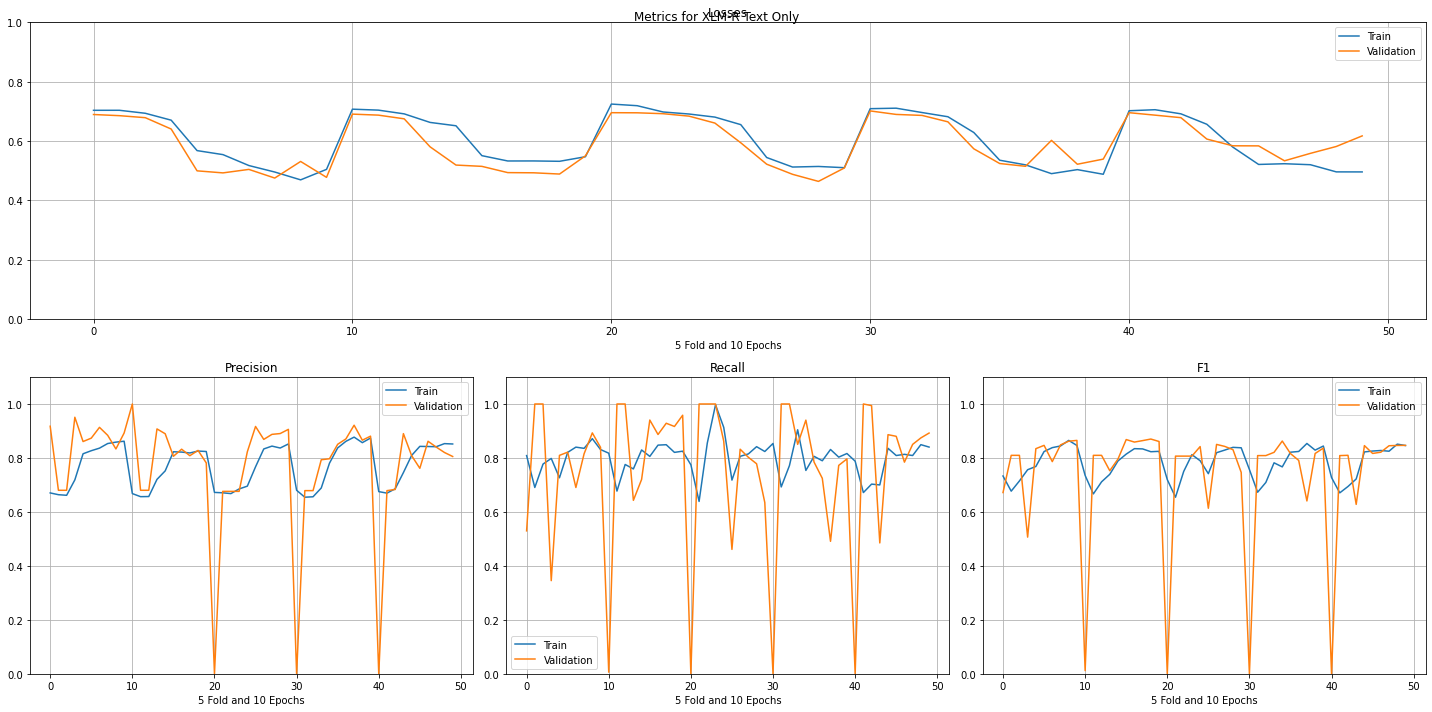

In [9]:
plot_results(txt_only_results[0],'XLM-R Text Only')

In [10]:
txt_only_results[1].sort_values(by=['validation_f1', 'train_f1'], ascending=False)

,train_f1,validation_f1,train_precision,validation_precision,train_recall,validation_recall,train_losses,validation_losses
8,0.823088,0.870056,0.825564,0.827957,0.820628,0.916667,0.532007,0.489051
5,0.814199,0.868132,0.822901,0.806122,0.805680,0.940476,0.551029,0.514978
9,0.846271,0.865031,0.862016,0.892405,0.831091,0.839286,0.504842,0.477944
7,0.833456,0.864266,0.818444,0.808290,0.849028,0.928571,0.533200,0.493270
4,0.766894,0.862637,0.780526,0.796954,0.753731,0.940120,0.629057,0.574076
8,0.864985,0.862069,0.858616,0.833333,0.871450,0.892857,0.469501,0.531444
9,0.824496,0.860963,0.823881,0.781553,0.825112,0.958333,0.547402,0.550423
6,0.834437,0.858790,0.821739,0.832402,0.847534,0.886905,0.533086,0.493861
6,0.819423,0.850153,0.833333,0.868750,0.805970,0.832335,0.544785,0.522262
7,0.844411,0.848297,0.853435,0.883871,0.835575,0.815476,0.495885,0.475570


In [11]:
mfcc_fusion_results = run_k_fold(base_model, gpu, data, sequences, attention_masks, targets, fusion=FusionTypes.MFCC,
                                       k_folds=5, epochs=10, balance_classes=True, dropout_level=0.25, lr=2e-4,
                                       max_seq_len=MAX_SEQ_LEN, n_layers=3, clip_at=1.0, img_path=IMG_PATH, hidden_dim=256)

Running Fusion Classification
FOLD 0
Class Weights : [1.55520505 0.73692078]
Epoch 1 / 10
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.701 / Validation : 0.679


/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:154: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Time for epoch : 11.219159 seconds
Epoch 2 / 10
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.699 / Validation : 0.680
Time for epoch : 6.429371 seconds
Epoch 3 / 10
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.693 / Validation : 0.680
Time for epoch : 6.44671 seconds
Epoch 4 / 10
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.693 / Validation : 0.680
Time for epoch : 6.434488 seconds
Epoch 5 / 10
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.692 / Validation : 0.680
Time for epoch : 6.444225 seconds
Epoch 6 / 10
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.689 / Validation : 0.679
Time for epoch : 6.396716 seconds
Epoch 7 / 10
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.687 / Validation : 0.671
Time for epoch : 11.294974 seconds
Epoch 8 / 10
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.622 / Validation : 0.51

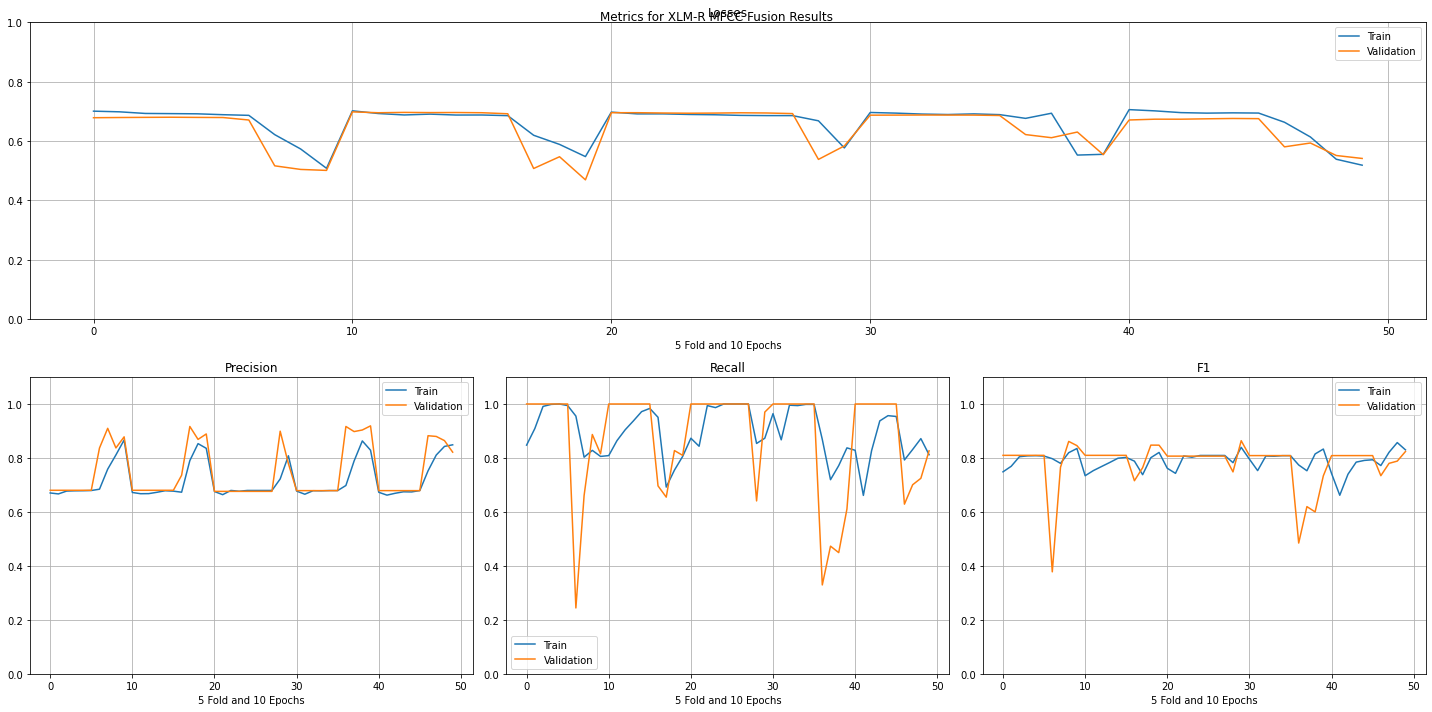

In [12]:
plot_results(mfcc_fusion_results[0],'XLM-R MFCC Fusion Results')

In [13]:
mfcc_fusion_results[1].sort_values(by=['validation_f1', 'train_f1'], ascending=False)

,train_f1,validation_f1,train_precision,validation_precision,train_recall,validation_recall,train_losses,validation_losses
9,0.839311,0.864000,0.808011,0.778846,0.873134,0.970060,0.577124,0.583781
8,0.819527,0.861272,0.811127,0.837079,0.828102,0.886905,0.573523,0.504620
8,0.800952,0.847561,0.853041,0.868750,0.754858,0.827381,0.588928,0.547372
9,0.820396,0.847352,0.835659,0.888889,0.805680,0.809524,0.547871,0.469502
9,0.835012,0.845679,0.866559,0.878205,0.805680,0.815476,0.508380,0.501342
9,0.829901,0.823881,0.848674,0.821429,0.811940,0.826347,0.518897,0.541605
4,0.808459,0.809639,0.678499,0.680162,1.000000,1.000000,0.692010,0.679931
3,0.807739,0.809639,0.678173,0.680162,0.998505,1.000000,0.692650,0.680491
5,0.807039,0.809639,0.679265,0.680162,0.994021,1.000000,0.689049,0.679490
2,0.804612,0.809639,0.677222,0.680162,0.991031,1.000000,0.693247,0.680072


In [14]:
mel_fusion_results = run_k_fold(base_model, gpu, data, sequences, attention_masks, targets, fusion=FusionTypes.MEL,
                                k_folds=5, epochs=15, 
                                balance_classes=True, dropout_level=0.1,
                                lr=7e-4,
                                max_seq_len=MAX_SEQ_LEN,
                                n_layers=1,
                                clip_at=1.0, img_path=IMG_PATH, hidden_dim=64,
                                img_height=80, img_width=80)

Running Fusion Classification
FOLD 0
Class Weights : [1.55520505 0.73692078]
Epoch 1 / 15
Training Model


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  "num_layers={}".format(dropout, num_layers))
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/conv.py:440: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at  /pytorch/aten/src/ATen/native/Convolution.cpp:660.)
  self.padding, self.dilation, self.groups)
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ce

  Batch    50  of     62.
Evaluating
Losses - Train : 0.708 / Validation : 0.691


/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:154: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Time for epoch : 661.079667 seconds
Epoch 2 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.696 / Validation : 0.690
Time for epoch : 45.258477 seconds
Epoch 3 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.692 / Validation : 0.683
Time for epoch : 48.245758 seconds
Epoch 4 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.663 / Validation : 0.640
Time for epoch : 47.24264 seconds
Epoch 5 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.575 / Validation : 0.557
Time for epoch : 44.194419 seconds
Epoch 6 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.535 / Validation : 0.507
Time for epoch : 45.636533 seconds
Epoch 7 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.540 / Validation : 0.519
Time for epoch : 37.660133 seconds
Epoch 8 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.520 / Validation 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Time for epoch : 45.067458 seconds
Epoch 2 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.698 / Validation : 0.692
Time for epoch : 46.929452 seconds
Epoch 3 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.692 / Validation : 0.691
Time for epoch : 45.719092 seconds
Epoch 4 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.688 / Validation : 0.681
Time for epoch : 45.462106 seconds
Epoch 5 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.631 / Validation : 0.537
Time for epoch : 45.963105 seconds
Epoch 6 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.565 / Validation : 0.526
Time for epoch : 44.309708 seconds
Epoch 7 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.526 / Validation : 0.542
Time for epoch : 39.373322 seconds
Epoch 8 / 15
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.505 / Validation 

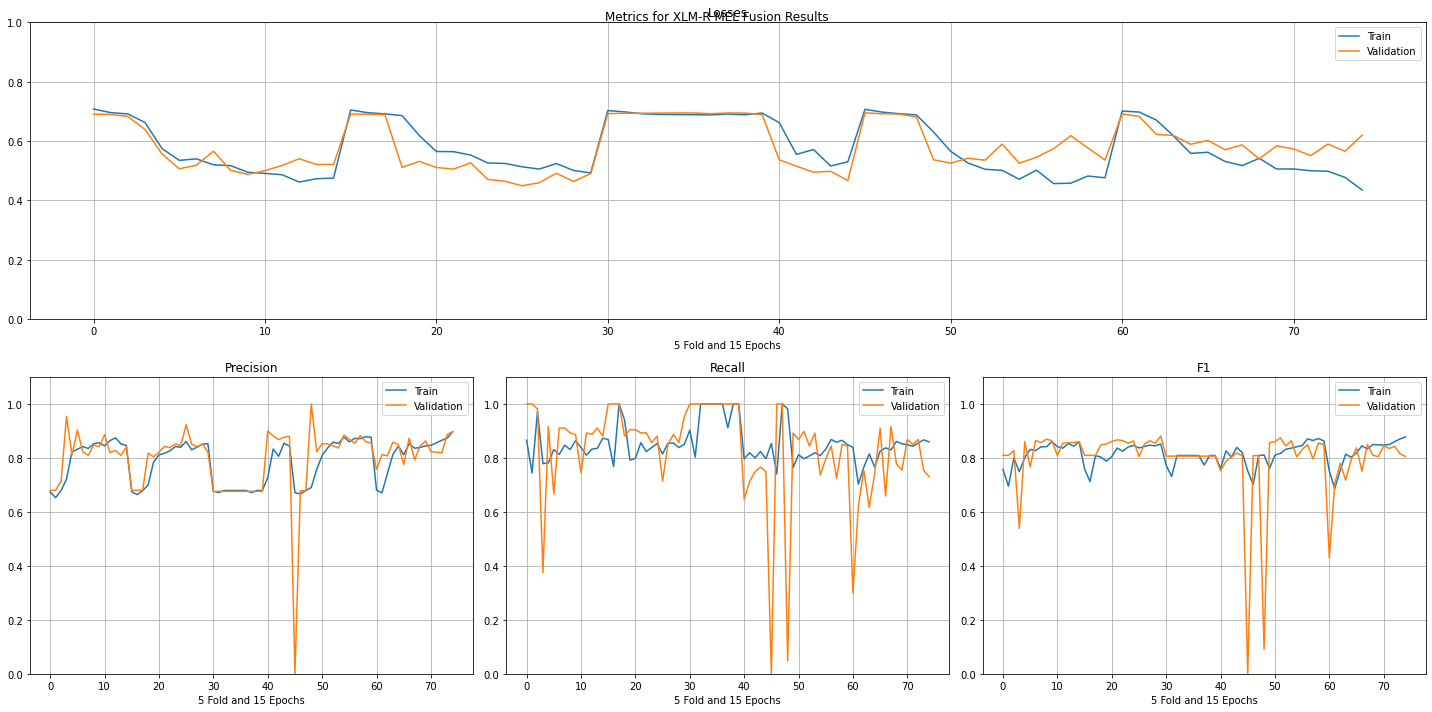

In [15]:
plot_results(mel_fusion_results[0], 'XLM-R MEL Fusion Results')

In [16]:
mel_fusion_results[1].sort_values(by=['validation_f1', 'train_f1'], ascending=False)

,train_f1,validation_f1,train_precision,validation_precision,train_recall,validation_recall,train_losses,validation_losses
14,0.851796,0.881543,0.853073,0.820513,0.850523,0.952381,0.492871,0.490495
6,0.816514,0.874636,0.836991,0.852273,0.797015,0.898204,0.526487,0.542328
8,0.841787,0.869565,0.852761,0.847458,0.831091,0.892857,0.517453,0.501402
6,0.836496,0.867052,0.817404,0.842697,0.856502,0.892857,0.564461,0.505714
7,0.824850,0.864553,0.826087,0.837989,0.823617,0.892857,0.553168,0.526765
...,...,...,...,...,...,...,...,...
1,0.686589,0.705085,0.670940,0.812500,0.702985,0.622754,0.697912,0.682975
3,0.749101,0.538462,0.721607,0.954545,0.778774,0.375000,0.662940,0.639690
0,0.751337,0.429185,0.680387,0.757576,0.838806,0.299401,0.701422,0.691737
3,0.810844,0.091429,0.690451,1.000000,0.982090,0.047904,0.688171,0.681059
